## EDA for `campaigns.csv`

Performing exploratory data analysis to gain insights about the campaigns for social media ads

In [144]:
# import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.lines import Line2D

In [71]:
# load users.csv 
path = os.getcwd()
campaigns = pd.read_csv(path + "/data/campaigns.csv")

# display first few rows to confirm data loaded properly
campaigns.head()

,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25
3,4,Campaign_4_Summer,2025-06-04,2025-08-08,65,45326.60
4,5,Campaign_5_Launch,2025-07-11,2025-08-28,48,68376.69


In [72]:
# sum missing entries
print(f"Number of missing values in campaigns\n{campaigns.isna().sum()}\n")

# get information about columns of campaigns
campaigns.info()

Number of missing values in campaigns
campaign_id      0
name             0
start_date       0
end_date         0
duration_days    0
total_budget     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    50 non-null     int64  
 1   name           50 non-null     object 
 2   start_date     50 non-null     object 
 3   end_date       50 non-null     object 
 4   duration_days  50 non-null     int64  
 5   total_budget   50 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


With no missing entries, we can proceed with processing the data 

In [73]:
# change start_date and end_date to pd datetime objects 
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'])
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'])

# replace underscores in name column with spaces
campaigns['name'] = campaigns['name'].str.replace('_', ' ')

# extract month from start_date and end_date
campaigns['start_month'] = campaigns['start_date'].dt.month
campaigns['end_month'] = campaigns['end_date'].dt.month

# show new results
campaigns.head()

,campaign_id,name,start_date,end_date,duration_days,total_budget,start_month,end_month
0,1,Campaign 1 Launch,2025-05-25,2025-07-23,59,24021.32,5,7
1,2,Campaign 2 Launch,2025-04-16,2025-07-07,82,79342.41,4,7
2,3,Campaign 3 Winter,2025-05-04,2025-06-29,56,14343.25,5,6
3,4,Campaign 4 Summer,2025-06-04,2025-08-08,65,45326.60,6,8
4,5,Campaign 5 Launch,2025-07-11,2025-08-28,48,68376.69,7,8


In [146]:
# necessary metrics for combined visualization
# extract summary statistics
total_campaigns = len(campaigns)
total_budget = campaigns['total_budget'].sum()
avg_duration = campaigns['duration_days'].mean()

# pie chart
month_values = campaigns['start_month'].value_counts()
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July'}
month_labels = [months[val] for val in list(month_values.index)]

# timeline 
campaigns_dates = campaigns[['campaign_id', 'start_date', 'total_budget']].sort_values(by = 'start_date').reset_index(drop = True)
levels = round(campaigns_dates['total_budget'] / 10000, 1)
for idx in levels.index:
    levels[idx] = -1 * levels[idx] if idx % 2 == 0 else levels[idx]

def expensive(budget):
    "Returns whether campaign is one of the more expensive campaigns (over 75k)"
    return budget >= 75000

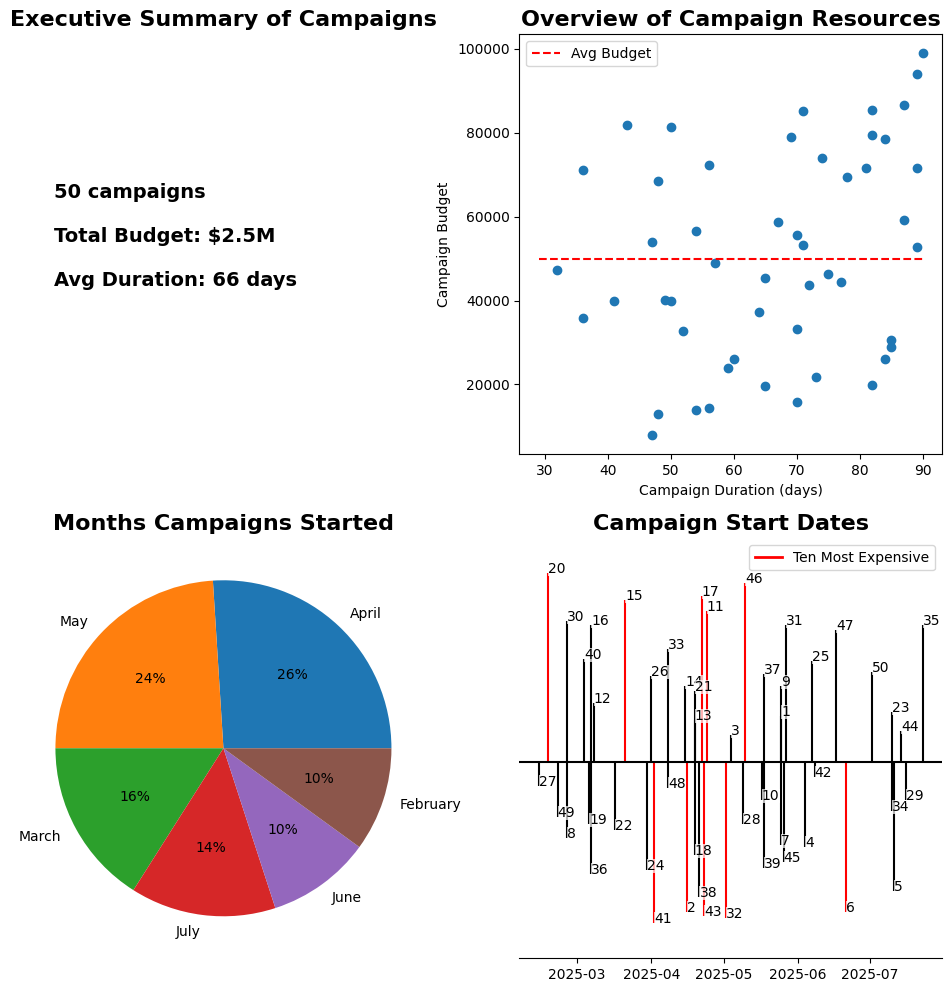

In [157]:
# combined visualization for campaigns
fig = plt.figure(figsize = (12, 12))

# Executive Summary
plt.subplot(2, 2, 1)
plt.text(0.1, 0.4, f'{total_campaigns} campaigns\n\nTotal Budget: $2.5M\n\nAvg Duration: {avg_duration:.0f} days',
         fontsize = 14, fontweight = 'bold')
plt.title('Executive Summary of Campaigns', fontsize = 16, fontweight = 'bold')
plt.axis('off')

# Duration vs Budget 
plt.subplot(2, 2, 2)
plt.scatter(x = campaigns['duration_days'], y = campaigns['total_budget'])
plt.hlines(y = 50000, xmin = 29, xmax = 90, colors = 'red', linestyles = '--', label = 'Avg Budget')
plt.xlabel("Campaign Duration (days)")
plt.ylabel("Campaign Budget")
plt.title('Overview of Campaign Resources', fontsize = 16, fontweight = 'bold')
plt.legend()

# Month Started Pie Chart
plt.subplot(2, 2, 3)
plt.pie(x = month_values.values, labels = month_labels, autopct = '%1.0f%%')
plt.title('Months Campaigns Started', fontsize = 16, fontweight = 'bold')

# Timeline
# Timeline as subplot
plt.subplot(2, 2, 4)
plt.title('Campaign Start Dates', fontsize = 16, fontweight = 'bold')

# vertical stems
plt.vlines(campaigns_dates['start_date'], 0, levels,
           color = [("red" if expensive(budget) else "black") for budget in campaigns_dates['total_budget']])
plt.axhline(0, c = 'black')
for idx in campaigns_dates.index:
    plt.annotate(str(campaigns_dates.loc[idx, 'campaign_id']),
                 xy = (campaigns_dates.loc[idx, 'start_date'], levels[idx]),
                 bbox = dict(boxstyle = 'square', pad = 0, lw = 0, fc = (1, 1, 1, 0.7)))

plt.gca().yaxis.set_visible(False)
plt.gca().spines[["left", "top", "right"]].set_visible(False)
plt.margins(y = 0.1)
legend_elements = [
    Line2D([0], [0], color = 'red', lw = 2, label = 'Ten Most Expensive')
]
plt.gca().legend(handles = legend_elements)
plt.show()
